# Analysis of Lahman Data

Calculate OBP * TB = Estimated Runs vs Runs<br />
Compare estimated run accuracy at team level vs league level<br />
Is Pythagorean more accurate using actual runs score or estimated runs scored? (Actual)

## STEP 1: Import Packages

In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## STEP 2: Read in data

In [2]:
teams_df = pd.read_csv('./data/core/Teams.csv',
                        delimiter=',',
                        usecols=['yearID','teamID','W','L','R','RA','AB','H','2B','3B','HR','BB','HBP','SF'])
teams_df

,yearID,teamID,W,L,R,AB,H,2B,3B,HR,BB,HBP,SF,RA
0,1871,BS1,20,10,401,1372,426,70,37,3,60.0,NaN,NaN,303
1,1871,CH1,19,9,302,1196,323,52,21,10,60.0,NaN,NaN,241
2,1871,CL1,10,19,249,1186,328,35,40,7,26.0,NaN,NaN,341
3,1871,FW1,7,12,137,746,178,19,8,2,33.0,NaN,NaN,243
4,1871,NY2,16,17,302,1404,403,43,21,1,33.0,NaN,NaN,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2018,SLN,88,74,759,5498,1369,248,9,205,525.0,80.0,48.0,691
2891,2018,TBA,90,72,716,5475,1415,274,43,150,540.0,101.0,50.0,646
2892,2018,TEX,67,95,737,5453,1308,266,24,194,555.0,88.0,34.0,848
2893,2018,TOR,73,89,709,5477,1336,320,16,217,499.0,58.0,37.0,832


## STEP 3: Calculate estimated vs actual runs by team

In [3]:
# Calculate OBP and TB for every team
obp_teams_df = teams_df.copy()
obp_teams_df['OBP'] = (obp_teams_df['H'].fillna(0) + obp_teams_df['BB'].fillna(0) + obp_teams_df['HBP'].fillna(0)) / (obp_teams_df['AB'].fillna(0) + obp_teams_df['SF'].fillna(0) + obp_teams_df['BB'].fillna(0) + obp_teams_df['HBP'].fillna(0))
obp_teams_df['TB'] = obp_teams_df['H'].fillna(0) + obp_teams_df['2B'].fillna(0) + (2*obp_teams_df['3B'].fillna(0)) + (3*obp_teams_df['HR'].fillna(0))
obp_teams_df

,yearID,teamID,W,L,R,AB,H,2B,3B,HR,BB,HBP,SF,RA,OBP,TB
0,1871,BS1,20,10,401,1372,426,70,37,3,60.0,NaN,NaN,303,0.339385,579
1,1871,CH1,19,9,302,1196,323,52,21,10,60.0,NaN,NaN,241,0.304936,447
2,1871,CL1,10,19,249,1186,328,35,40,7,26.0,NaN,NaN,341,0.292079,464
3,1871,FW1,7,12,137,746,178,19,8,2,33.0,NaN,NaN,243,0.270860,219
4,1871,NY2,16,17,302,1404,403,43,21,1,33.0,NaN,NaN,313,0.303410,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2018,SLN,88,74,759,5498,1369,248,9,205,525.0,80.0,48.0,691,0.320923,2250
2891,2018,TBA,90,72,716,5475,1415,274,43,150,540.0,101.0,50.0,646,0.333441,2225
2892,2018,TEX,67,95,737,5453,1308,266,24,194,555.0,88.0,34.0,848,0.318271,2204
2893,2018,TOR,73,89,709,5477,1336,320,16,217,499.0,58.0,37.0,832,0.311810,2339


In [31]:
# Calculate expected runs and difference in expected and actual runs
runs_df = obp_teams_df[['yearID','teamID','W','L','R','RA','OBP','TB']].copy()
runs_df['EST_R'] = runs_df['OBP']*runs_df['TB']
runs_df['R_DIFF'] = runs_df['R'] - runs_df['EST_R']
runs_df['R_DIFF_SQ'] = (runs_df['R'] - runs_df['EST_R'])**2
runs_df['R_DIFF_PERC'] = abs(runs_df['R_DIFF']) / runs_df['R']
runs_df

,yearID,teamID,W,L,R,RA,OBP,TB,EST_R,R_DIFF,R_DIFF_SQ,R_DIFF_PERC
0,1871,BS1,20,10,401,303,0.339385,579,196.504190,204.495810,41818.536330,0.509965
1,1871,CH1,19,9,302,241,0.304936,447,136.306529,165.693471,27454.326444,0.548654
2,1871,CL1,10,19,249,341,0.292079,464,135.524752,113.475248,12876.631801,0.455724
3,1871,FW1,7,12,137,243,0.270860,219,59.318357,77.681643,6034.437680,0.567019
4,1871,NY2,16,17,302,313,0.303410,491,148.974252,153.025748,23416.879577,0.506708
...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2018,SLN,88,74,759,691,0.320923,2250,722.077711,36.922289,1363.255429,0.048646
2891,2018,TBA,90,72,716,646,0.333441,2225,741.907233,-25.907233,671.184733,0.036183
2892,2018,TEX,67,95,737,848,0.318271,2204,701.468842,35.531158,1262.463206,0.048211
2893,2018,TOR,73,89,709,832,0.311810,2339,729.324164,-20.324164,413.071645,0.028666


In [32]:
# Filtering to 1970+ because that is when HBP and SF started being tracked
filtered_runs_df = runs_df[(runs_df['yearID'] >= 1970) & (runs_df['yearID'] <= 2018)]

# Plot the error percentages
fig = px.histogram(filtered_runs_df, x="R_DIFF_PERC")
fig.show()

In [33]:
# Percentage of errors below 1%
filtered_runs_df['R_DIFF_PERC'][filtered_runs_df['R_DIFF_PERC']<=0.01].count() / filtered_runs_df['R_DIFF_PERC'].count()

0.1964549483013294

In [34]:
# Percentage of errors below 5%
filtered_runs_df['R_DIFF_PERC'][filtered_runs_df['R_DIFF_PERC']<=0.05].count() / filtered_runs_df['R_DIFF_PERC'].count()

0.8234859675036927

In [35]:
# Look at the tail ends of R_DIFF_PERC
sorted_runs_df = filtered_runs_df.sort_values(by=['R_DIFF_PERC'])
sorted_runs_df

,yearID,teamID,W,L,R,RA,OBP,TB,EST_R,R_DIFF,R_DIFF_SQ,R_DIFF_PERC
1762,1979,BAL,102,57,757,582,0.336412,2250,756.926121,0.073879,0.005458,0.000098
1994,1987,TOR,96,66,845,655,0.336420,2512,845.087658,-0.087658,0.007684,0.000104
2432,2003,MON,83,79,711,716,0.326109,2180,710.916612,0.083388,0.006954,0.000117
1787,1980,ATL,81,80,630,660,0.306673,2054,629.907285,0.092715,0.008596,0.000147
1737,1978,BOS,99,64,796,657,0.335786,2371,796.149256,-0.149256,0.022277,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...
2533,2006,TOR,87,75,809,754,0.348273,2590,902.027309,-93.027309,8654.080264,0.114990
2475,2005,ARI,77,85,696,856,0.332481,2337,777.007673,-81.007673,6562.243026,0.116390
2784,2015,DET,74,87,689,803,0.327738,2355,771.822849,-82.822849,6859.624277,0.120207
2175,1994,SDN,47,70,479,531,0.329589,1631,537.559425,-58.559425,3429.206239,0.122253


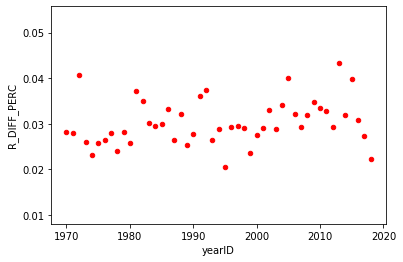

In [36]:
# Group by year and average R_DIFF_PERC
year_error_df = filtered_runs_df.groupby(["yearID"], as_index=False)["R_DIFF_PERC"].mean()

year_error_df.plot(kind='scatter',x='yearID',y='R_DIFF_PERC',color='red')
plt.show()

## STEP 4: Calculate estimated vs actual by league

In [38]:
lg_teams_df = teams_df.copy()
lg_teams_df = lg_teams_df.groupby(["yearID"], as_index=False).sum()
lg_teams_df['OBP'] = (lg_teams_df['H'].fillna(0) + lg_teams_df['BB'].fillna(0) + lg_teams_df['HBP'].fillna(0)) / (lg_teams_df['AB'].fillna(0) + lg_teams_df['SF'].fillna(0) + lg_teams_df['BB'].fillna(0) + lg_teams_df['HBP'].fillna(0))
lg_teams_df['TB'] = lg_teams_df['H'].fillna(0) + lg_teams_df['2B'].fillna(0) + (2*lg_teams_df['3B'].fillna(0)) + (3*lg_teams_df['HR'].fillna(0))

lg_teams_df = lg_teams_df[['yearID','R','RA','OBP','TB']]
lg_teams_df['EST_R'] = lg_teams_df['OBP']*lg_teams_df['TB']
lg_teams_df['R_DIFF'] = lg_teams_df['R'] - lg_teams_df['EST_R']
lg_teams_df['R_DIFF_SQ'] = (lg_teams_df['R'] - lg_teams_df['EST_R'])**2
lg_teams_df['R_DIFF_PERC'] = abs(lg_teams_df['R_DIFF']) / lg_teams_df['R']

lg_teams_df

,yearID,R,RA,OBP,TB,EST_R,R_DIFF,R_DIFF_SQ,R_DIFF_PERC
0,1871,2659,2659,0.311547,4154,1294.166384,1364.833616,1.862771e+06,0.513288
1,1872,3390,3390,0.296961,5449,1618.142265,1771.857735,3.139480e+06,0.522672
2,1873,3580,3580,0.304210,6059,1843.205678,1736.794322,3.016455e+06,0.485138
3,1874,3470,3470,0.282391,6366,1797.698894,1672.301106,2.796591e+06,0.481931
4,1875,4234,4234,0.260727,8317,2168.463814,2065.536186,4.266440e+06,0.487845
...,...,...,...,...,...,...,...,...,...
143,2014,19761,19761,0.313683,63988,20071.979514,-310.979514,9.670826e+04,0.015737
144,2015,20647,20647,0.316790,66953,21210.073154,-563.073154,3.170514e+05,0.027271
145,2016,21744,21744,0.321583,69106,22223.321327,-479.321327,2.297489e+05,0.022044
146,2017,22582,22582,0.324461,70517,22880.045891,-298.045891,8.883135e+04,0.013198


In [39]:
# Filtering to 1970+ because that is when HBP and SF started being tracked
filtered_lg_df = lg_teams_df[(lg_teams_df['yearID'] >= 1970) & (lg_teams_df['yearID'] <= 2018)]

# Plot the error percentages
fig = px.histogram(filtered_lg_df, x="R_DIFF_PERC")
fig.show()

In [40]:
# Percentage of errors below 1%
filtered_lg_df['R_DIFF_PERC'][filtered_lg_df['R_DIFF_PERC']<=0.01].count() / filtered_lg_df['R_DIFF_PERC'].count()

0.3877551020408163

In [41]:
# Percentage of errors below 1%
filtered_lg_df['R_DIFF_PERC'][filtered_lg_df['R_DIFF_PERC']<=0.05].count() / filtered_lg_df['R_DIFF_PERC'].count()

1.0

In [42]:
# Look at the tail ends of R_DIFF_PERC
sorted_lg_df = filtered_lg_df.sort_values(by=['R_DIFF_PERC'])
sorted_lg_df

,yearID,R,RA,OBP,TB,EST_R,R_DIFF,R_DIFF_SQ,R_DIFF_PERC
110,1981,11147,11147,0.320077,34818,11144.435543,2.564457,6.576439,0.000230
108,1979,18713,18713,0.329835,56757,18720.450849,-7.450849,55.515152,0.000398
112,1983,18170,18170,0.324960,55875,18157.117570,12.882430,165.957009,0.000709
124,1995,19554,19554,0.337841,57824,19535.341559,18.658441,348.137416,0.000954
101,1972,13706,13706,0.310531,44180,13719.269696,-13.269696,176.084828,0.000968
121,1992,17341,17341,0.322352,53911,17378.339866,-37.339866,1394.265568,0.002153
100,1971,15073,15073,0.316824,47683,15107.120203,-34.120203,1164.188266,0.002264
125,1996,22831,22831,0.340454,66903,22777.360875,53.639125,2877.155740,0.002349
111,1982,18110,18110,0.324006,56032,18154.692907,-44.692907,1997.455915,0.002468
113,1984,17921,17921,0.322866,55338,17866.776378,54.223622,2940.201230,0.003026


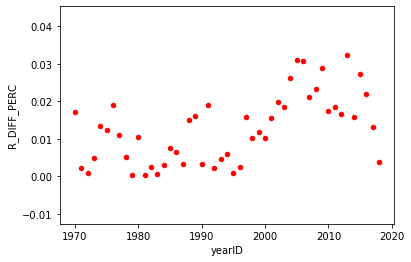

In [43]:
# Group by year and average R_DIFF_PERC
year_lg_error_df = filtered_lg_df.groupby(["yearID"], as_index=False)["R_DIFF_PERC"].mean()

year_lg_error_df.plot(kind='scatter',x='yearID',y='R_DIFF_PERC',color='red')
plt.show()

## STEP 5: Calculate pythagorean for estimated vs actual runs

In [62]:
# Filtering to 1970+ because that is when HBP and SF started being tracked
pythag_df = runs_df[(runs_df['yearID'] >= 1970) & (runs_df['yearID'] <= 2018)].copy()
pythag_df = pythag_df[['yearID','teamID','W','L','R','RA','EST_R']]

# W%=[(Runs Scored)^1.81]/[(Runs Scored)^1.81 + (Runs Allowed)^1.81]
pythag_df['pythag_actual'] = (pythag_df['R']**1.81)/((pythag_df['R']**1.81)+(pythag_df['RA']**1.81))
pythag_df['pythag_est'] = (pythag_df['EST_R']**1.81)/((pythag_df['EST_R']**1.81)+(pythag_df['RA']**1.81))
pythag_df['win_perc'] = pythag_df['W']/(pythag_df['W'] + pythag_df['L'])

# Squared error
pythag_df['error_actual'] = pythag_df['pythag_actual'] - pythag_df['win_perc']
pythag_df['error_est'] = pythag_df['pythag_est'] - pythag_df['win_perc']
pythag_df['error_actual_sq'] = pythag_df['error_actual']**2
pythag_df['error_est_sq'] = pythag_df['error_est']**2

pythag_df

,yearID,teamID,W,L,R,RA,EST_R,pythag_actual,pythag_est,win_perc,error_actual,error_est,error_actual_sq,error_est_sq
1541,1970,ATL,76,86,736,772,748.062785,0.478405,0.485751,0.469136,0.009269,0.016615,8.590993e-05,0.000276
1542,1970,BAL,108,54,792,574,765.025189,0.641688,0.627142,0.666667,-0.024979,-0.039525,6.239473e-04,0.001562
1543,1970,BOS,87,75,786,722,793.569498,0.538356,0.542664,0.537037,0.001319,0.005627,1.739842e-06,0.000032
1544,1970,CAL,86,76,631,630,620.789082,0.500718,0.493336,0.530864,-0.030147,-0.037528,9.088123e-04,0.001408
1545,1970,CHA,56,106,633,822,627.599901,0.383930,0.380269,0.345679,0.038251,0.034590,1.463169e-03,0.001196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2018,SLN,88,74,759,691,722.077711,0.542371,0.519896,0.543210,-0.000839,-0.023314,7.042640e-07,0.000544
2891,2018,TBA,90,72,716,646,741.907233,0.546419,0.562312,0.555556,-0.009136,0.006756,8.346857e-05,0.000046
2892,2018,TEX,67,95,737,848,701.468842,0.436856,0.414992,0.413580,0.023276,0.001412,5.417822e-04,0.000002
2893,2018,TOR,73,89,709,832,729.324164,0.428112,0.440680,0.450617,-0.022505,-0.009937,5.064866e-04,0.000099


In [63]:
# MSE
pythag_df[['error_actual_sq','error_est_sq']].mean()

error_actual_sq    0.000634
error_est_sq       0.000868
dtype: float64

In [64]:
# Error
pythag_df[['error_actual','error_est']].mean()

error_actual    0.000241
error_est       0.004114
dtype: float64